In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 T-shirt/top


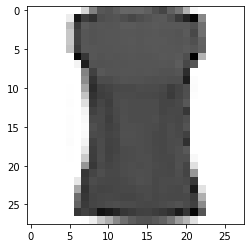

In [9]:
n = 3333
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

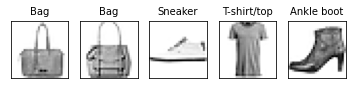

In [10]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  

In [11]:
pick

array([32408, 11595, 49060, 52435, 56624])

In [0]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [13]:
y_train.shape

(60000,)

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(14, (4, 4), padding = 'same',
         input_shape= (28,28,1),
         activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [0]:
model.add(Conv2D(28, (4,4), padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
model.add(Conv2D(56, (4,4), padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

In [0]:
model.add(Flatten())
model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 14)        238       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 14)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 28)        6300      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 30)        13470     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 30)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 28)          13468     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 28)          0

In [0]:
model.compile(loss = 'mse', optimizer=SGD(lr = 0.98),
             metrics = ['accuracy'])

In [27]:
model.fit(x_train, y_train, batch_size = 200, epochs = 20)

Epoch 1/20
300/300 [==============================] - 5s 15ms/step - loss: 0.0802 - accuracy: 0.3485
Epoch 2/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0345 - accuracy: 0.7461
Epoch 3/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0256 - accuracy: 0.8188
Epoch 4/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0224 - accuracy: 0.8418
Epoch 5/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0204 - accuracy: 0.8577
Epoch 6/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0192 - accuracy: 0.8668
Epoch 7/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0181 - accuracy: 0.8755
Epoch 8/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0174 - accuracy: 0.8798
Epoch 9/20
300/300 [==============================] - 4s 15ms/step - loss: 0.0167 - accuracy: 0.8846
Epoch 10/20
300/300 [==============================] - 5s 15ms/step - loss: 0.0160 - accura

In [28]:
result = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
def my_predict(n):
    print('CNN預測是', class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap = 'Greys')

In [0]:
from ipywidgets import interact_manual

CNN預測是 Shirt


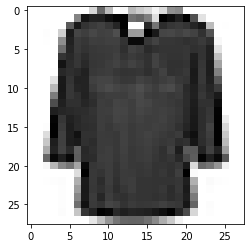

In [31]:
my_predict(145)

In [32]:
interact_manual(my_predict, n = (0, 9999))

interactive(children=(IntSlider(value=4999, description='n', max=9999), Button(description='Run Interact', sty…

<function __main__.my_predict>

In [33]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0158 - accuracy: 0.8918


In [0]:
loss, acc = score

In [35]:
print('測試資料的正確率為', acc)

測試資料的正確率為 0.8917999863624573


In [0]:
model.save('myCNNmodel.h5')